# Flatten observations for the night February 17th 2021

https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with wl_2021_02
- use jupyter kernel LSST
- requires the installation https://github.com/mfisherlevine/summit
- requires to write in file {HOME}/notebooks/.user_setups


In [2]:
#!/bin/sh
# This file is expected to be found in ${HOME}/notebooks/.user_setups
#  It is a shell fragment that will be sourced during kernel startup
#  when the LSST kernel is started in a JupyterLab environment.  It runs
#  in the user context and can contain arbitrary shell code.  Exported changes
#  in its environment will persist into the JupyterLab Python environment.

#    setup -j rapid_analysis -r ${HOME}/repos/rapid_analysis
#    setup -j atmospec       -r ${HOME}/repos/atmospec

In [2]:
! eups list -s

afw                   21.0.0-7-g484459ba0+ec3713772a 	current w_2021_02 setup
alert_packet          master-g9c6f3ccb69 	current w_2021_02 setup
ap_association        21.0.0-3-g88e2395+3185591824 	current w_2021_02 setup
ap_pipe               21.0.0-8-ga29d378+1e78883ff8 	current w_2021_02 setup
ap_verify             21.0.0-8-ge08b8c0+00a3cd4381 	current w_2021_02 setup
astro_metadata_translator 0.1.0-18-g39729a3+2c88556dba 	current w_2021_02 setup
astshim               21.0.0-2-g45278ab+1b62c9342b 	current w_2021_02 setup
atmospec              LOCAL:/home/dagoret/repos/atmospec 	setup
base                  21.0.0-3-g5051ac2+1b62c9342b 	current w_2021_02 setup
cbp                   21.0.0-2-g143869c+68734f91bf 	current w_2021_02 setup
coadd_utils           21.0.0-2-g7f82c8f+0fa6211a2a 	current w_2021_02 setup
cp_pipe               21.0.0-5-gb7080ec+be549261b9 	current w_2021_02 setup
ctrl_bps              21.0.0-6-g55737e1+9538d236c5 	current w_2021_02 setup
ctrl_execute          21.0.0

In [25]:
# correct for bug in stack in wl_2021_02
%config IPCompleter.use_jedi=False

# Import

In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

# Logbook with rapid analysis

In [6]:
from lsst.rapid.analysis.nightReport import NightReporter
repoDir='/project/shared/auxTel'
reporter=NightReporter(repoDir,"2021-02-17")

Loaded data for seqNums 1 to 475


In [7]:
reporter.getObservedObjects()

['HD 60753',
 'HD 149609',
 'HD 185975',
 'HR 5862',
 'HD 164461',
 'HD 60517',
 'NGC 4755']

In [8]:
reporter.makePolarPlotForObjects()

/home/dagoret/repos/rapid_analysis/python/lsst/rapid/analysis/nightReport.py:135: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111, polar=True)


In [10]:
reporter.plotPerObjectAirMass(versusMjd=False)

In [9]:
reporter.printObsTable()

{seqNum:4} {imageType:9} {obj:10} {timeOfDay} {filt:25} {dt.sec:6.1f}  {expTime:2.2f}
   1 bias      azel_target 19:52:33.537 RG610~empty                  0.0  0.00
   2 bias      azel_target 20:06:14.971 RG610~empty                821.4  0.00
   3 bias      azel_target 20:07:00.047 RG610~empty                 45.1  0.00
   4 bias      azel_target 20:07:43.977 RG610~empty                 43.9  0.00
   5 bias      azel_target 20:08:27.986 RG610~empty                 44.0  0.00
   6 bias      azel_target 20:09:11.965 RG610~empty                 44.0  0.00
   7 bias      azel_target 20:09:56.018 RG610~empty                 44.1  0.00
   8 bias      azel_target 20:10:39.990 RG610~empty                 44.0  0.00
   9 bias      azel_target 20:11:22.975 RG610~empty                 43.0  0.00
  10 bias      azel_target 20:12:07.035 RG610~empty                 44.1  0.00
  11 bias      azel_target 20:12:50.020 RG610~empty                 43.0  0.00
  12 bias      azel_target 20:13:34.015 RG610

# flats

In [10]:
butler=dafPersist.Butler("/project/shared/auxTel")
dayObs="2021-02-17"

In [11]:
flats_Nums=np.arange(96,136)

In [30]:
flats_Nums[0]

96

In [35]:
all_images=[]

raw=butler.get('raw',dayObs=dayObs,seqNum=96)
all_images.append(raw.image.array)
raw=butler.get('raw',dayObs=dayObs,seqNum=97)
all_images.append(raw.image.array)
raw=butler.get('raw',dayObs=dayObs,seqNum=98)
all_images.append(raw.image.array)
raw=butler.get('raw',dayObs=dayObs,seqNum=99)
all_images.append(raw.image.array)

In [36]:
flats=np.zeros(raw.image.array.shape)

In [37]:
for image in all_images:
    flats+=image
    

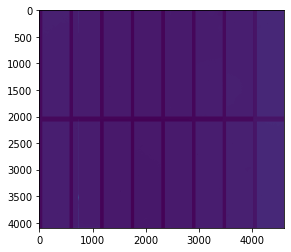

In [39]:
plt.imshow(flats)

In [28]:
for idx in np.arange(97,135):
    print(idx)
    raw=butler.get('raw',dayObs=dayObs,seqNum=idx)
    flats+=raw.image.array

97


NoResults: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'dayObs': '2021-02-17', 'seqNum': 97}, tag=set())

In [ ]:
plt.imshow(flats,origin="lower")

In [ ]:
alert False

# Butler

In [ ]:
butler=dafPersist.Butler("/project/shared/auxTel")

In [ ]:
dayObs="2021-02-17"

In [ ]:
all_myseq=[350,351,352,353,354,355,356,357,358]

In [ ]:
seqNum=all_myseq[1]

# Display

In [ ]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug1_2021_02_17',url=os.environ["FIREFLY_URL"])

In [ ]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

In [ ]:
display1.mtv(raw)

In [ ]:
display1.getClient().display_url()

# Meta Query to the Butler

In [ ]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

In [ ]:
seqNums=butler.queryMetadata('raw','seqNum',dayObs=dayObs)

In [ ]:
%config IPCompleter.use_jedi=False

## Butler Query meta data

In [ ]:
ids=butler.queryMetadata('raw',["dayObs", "seqNum"],object='NGC 4755')

In [ ]:
count=0
for dataid in ids:
    print(dataid)
    count+=1

# Exp 

In [ ]:
exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

In [ ]:
display1.mtv(exp)

In [ ]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(131)
ax1.imshow(exp.image.array,origin="lower",cmap="jet")
ax2=fig.add_subplot(132)
ax2.imshow(exp.mask.array,origin="lower",cmap="jet")
ax3=fig.add_subplot(133)
ax3.imshow(exp.variance.array,origin="lower",cmap="jet")

In [ ]:
exp.image.array.shape

In [ ]:
raw.image.array.shape

## Meta Data

In [ ]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [ ]:
md.toDict()

# Start to work on raw images

In [ ]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [ ]:
all_myseq=[350,351,352,353,354,355,356,357,358]

In [ ]:
Ncol=3
Nrow=3

In [ ]:
all_my_raw_array=[]
all_my_header=[]
for seqNum in all_myseq:
    raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)
    md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)
    all_my_raw_array.append(np.copy(raw.image.array))
    all_my_header.append(md.toDict())

In [ ]:
Ncol=3
Nrow=3
Ntot=Ncol*Nrow

In [ ]:
fig = plt.figure(figsize=(16,16))

# loop on angle
for idx in np.arange(Ntot):
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(all_my_raw_array[idx],origin='lower',cmap="jet")
    ax.set_title(all_myseq[idx])

In [ ]:
from astropy.io import fits

In [ ]:
idx=0
for seqNum in all_myseq:
    filename="holo4_003_NGC4755_"+dayObs+"_"+str(seqNum)+"_noheader.fits"
    print(filename)
    
    hdr = fits.Header()
    
    for key,value in all_my_header[idx].items():
        hdr[str(key)]=value
        
    hdu = fits.PrimaryHDU(data=all_my_raw_array[idx],header=hdr)
    hdu = fits.PrimaryHDU(data=all_my_raw_array[idx])
    
    hdul = fits.HDUList([hdu])
    
    hdul.writeto(filename,overwrite=True)
    
    idx+=1